skfuzzy
=====
1. `skfuzzy.fuzzymath`: Core fuzzy mathematics subpackage.
2. `skfuzzy.membership`: Fuzzy membership function subpackage.
    - *trimf*: Triangular membership function generator.
    - *trapmf*: Trapezoidal membership function generator.
    - *sigmf*: The basic sigmoid membership function generator.
    - psigmf: Product of two sigmoid membership functions.
    - dsigmf: Difference of two fuzzy sigmoid membership functions.
    - *gaussmf*: Gaussian fuzzy membership function.
    - gauss2mf: Gaussian fuzzy membership function of two combined Gaussians.
    - *gbellmf*: Generalized Bell function fuzzy membership generator.
    - piecemf: Piecewise linear membership function (particularly used in FIRE filters).
    - pimf: Pi-function fuzzy membership generator.
    - smf: S-function fuzzy membership generator.
    - zmf: Z-function fuzzy membership generator.
3. `skfuzzy.cluster`: Clustering subpackage including fuzzy c-means.
4. `skfuzzy.intervals`: Interval subpackage.
5. `skfuzzy.filters`: Filtering subpackage, including 1D and 2D FIRE functions.
6. `skfuzzy.defuzzify`: Defuzzification subpackage.
7. `skfuzzy.image`: Image processing subpackage.
8. `skfuzzy.control`: Fuzzy control system subpackage.
   - Antecedent: Antecedent (input/sensor) variable for a fuzzy control system.
   - Consequent: Consequent (output/control) variable for a fuzzy control system.
   - Rule: Rule in a fuzzy control system, connecting antecedent(s) to consequent(s).
   - ControlSystem: Base class to contain a Fuzzy Control System.
   - ControlSystemSimulation: Calculate results from a ControlSystem.

## ControlSystem: Base class to contain a Fuzzy Control System.
the system is initialized and populated with a set of fuzzy Rules (see ``skfuzzy.control.Rule``). This is optional. If omitted the ControlSystem can be built interactively.

In [1]:
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import numpy as np

quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

quality.automf(3)
service.automf(3)
tip.automf(3, 'quant')

# rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'], 'IF quality is poor OR service is poor, THEN tip is low.')
# rule2 = ctrl.Rule(service['average'], tip['average'], 'IF service is average, THEN tip is average.')
# rule3 = ctrl.Rule(quality['good'] | service['good'] , tip['high'], 'IF quality is good OR service is good, THEN tip is high.')
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'], 'R1')
rule2 = ctrl.Rule(service['average'], tip['average'], 'R2')
rule3 = ctrl.Rule(quality['good'] | service['good'], tip['high'], 'R3')
system = ctrl.ControlSystem([rule1, rule2, rule3])
print(system.__doc__)


    Base class to contain a Fuzzy Control System.

    Parameters
    ----------
    rule_list : Rule or iterable of Rules, optional
        If provided, the system is initialized and populated with a set of
        fuzzy Rules (see ``skfuzzy.control.Rule``). This is optional. If
        omitted the ControlSystem can be built interactively.
    


### `graph` attribute

nodes:
- all of the rules (3)
- all of the Antecedents and Consequents (2 + 1 = 3)
- all of the terms (3 * 3 = 9)
  
edges:
- term of Antecedents --> corresponding rule (2 + 1 + 2 = 5)
- rule --> term of corresponding Consequent (1 + 1 + 1 = 3)
- Antecedent --> corresponding term (3 + 3 = 6)
- Consequent --> corresponding term (3)

In [2]:
print(f"number of nodes: {system.graph.number_of_nodes()}")
print(f"nodes: {system.graph.nodes}")
print(f"number of edges: {system.graph.number_of_edges()}")
print(f"edges: {system.graph.edges}") 

number of nodes: 15
nodes: [quality[poor], IF quality[poor] OR service[poor] THEN tip[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax, Antecedent: quality, quality[average], quality[good], service[poor], Antecedent: service, service[average], service[good], tip[low], Consequent: tip, tip[average], tip[high], IF service[average] THEN tip[average]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF quality[good] OR service[good] THEN tip[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax]
number of edges: 17
edges: [(quality[poor], IF quality[poor] OR service[poor] THEN tip[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax), (IF quality[poor] OR service[poor] THEN tip[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax, tip[low]), (Antecedent: quality, quality[poor]), (Antecedent: quality, quality[average]), (Antecedent: quality, quality[good]), (quality[good], IF quality[good] OR servic

### @property attributes
- `rules` generator
- `antecedents` generator
- `consequents` generator
- `fuzzy_variables` generator

In [6]:
print("system.rules:")
for r in system.rules:
    print(r)
print("\nsystem.antecedents:")
for ante in system.antecedents:
    print(ante)
print("\nsystem.consequnts:")
for cons in system.consequents:
    print(cons)
print("\nsystem.fuzzy_variables:")
for fv in system.fuzzy_variables:
    print(fv)


system.rules:
IF quality[poor] OR service[poor] THEN tip[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF service[average] THEN tip[average]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF quality[good] OR service[good] THEN tip[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax

system.antecedents:
Antecedent: quality
Antecedent: service

system.consequnts:
Consequent: tip

system.fuzzy_variables:
Antecedent: quality
Antecedent: service
Consequent: tip


In [59]:
print(system.addrule.__doc__)


        Add a new rule to the system.
        



        View a representation of the system NetworkX graph.
        


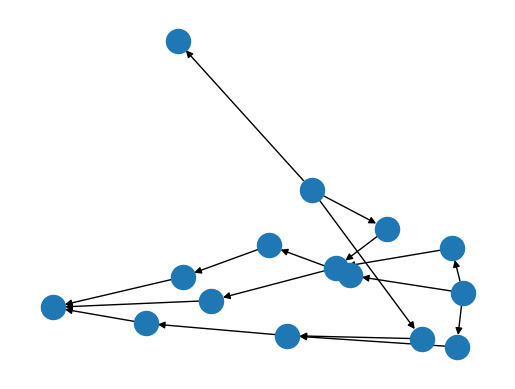

In [65]:
print(system.view.__doc__)
system.view()

## FuzzyVariable: Antecedent and Consequent
FuzzyVariable class is designed as the base class underlying the Antecedent and Consequent classes.(see `skfuzzy.control.fuzzyvariable`, `skfuzzy.control.antecedent_consequent`)

In [9]:
# attributes of FuzzyVariable(parent class)
print(f"universe: {quality.universe}")  
print(f"label: {quality.label}") 
print(f"defuzzify_method: {quality.defuzzify_method}")
print(f"terms: {quality.terms}")

universe: [ 0  1  2  3  4  5  6  7  8  9 10]
label: quality
defuzzify_method: centroid
terms: OrderedDict([('poor', quality[poor]), ('average', quality[average]), ('good', quality[good])])


StatefulProperty
- Antecedent.input
- Consequent.output

Contains framework to hold variables unique to a simulation.This allows simulations to be precalculated and then referenced later for a dramatic efficiency gain. This gain is only realized for smaller systems, usually with discrete-valued inputs.

In [14]:
print(quality.input)
print(tip.output)

In [10]:
# attributes of Antecedent object
print(f"name: {quality.__name__}")
# attributes of Consequent object
print(f"name: {tip.__name__}")

name: Antecedent
name: Consequent


In [40]:
# NetworkX graph which connects this Antecedent/Consequent with its Term(s).
print(f"graph of quality: {quality.graph.edges}")
print(f"graph of service: {service.graph.edges}")
print(f"graph of tip: {tip.graph.edges}")

graph of quality: [(Antecedent: quality, quality[poor]), (Antecedent: quality, quality[average]), (Antecedent: quality, quality[good])]
graph of service: [(Antecedent: service, service[poor]), (Antecedent: service, service[average]), (Antecedent: service, service[good])]
graph of tip: [(tip[poor], Consequent: tip), (tip[average], Consequent: tip), (tip[good], Consequent: tip)]


In [45]:
# methods of Antecedent
print(f"__repr__(): {service.__repr__()}")
print(f"__len__(): {service.__len__()}")    # self.universe.size
print(f"__getitem__(key): {service.__getitem__('poor')}")   # return the 'label' term


__repr__(): Antecedent: service
__len__(): 11
__getitem__(key): service[poor]


d:\Anaconda\envs\mytorch\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


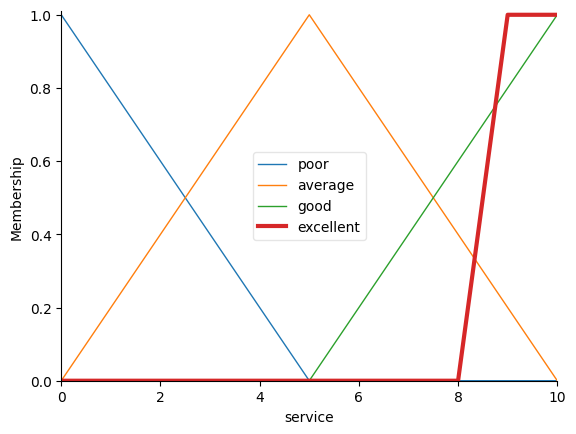

In [101]:
item = fuzz.trapmf(np.arange(0, 11, 1), [8, 9, 10, 10])
service.__setitem__('excellent', item)
service['excellent'].view()

## Term: a universe and associated specific membership function
For example, if one were creating a FuzzyVariable with a simple three-point liker scale, three `Term` would be created named poor, average, and good. (see `skfuzzy.control.term`)

d:\Anaconda\envs\mytorch\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


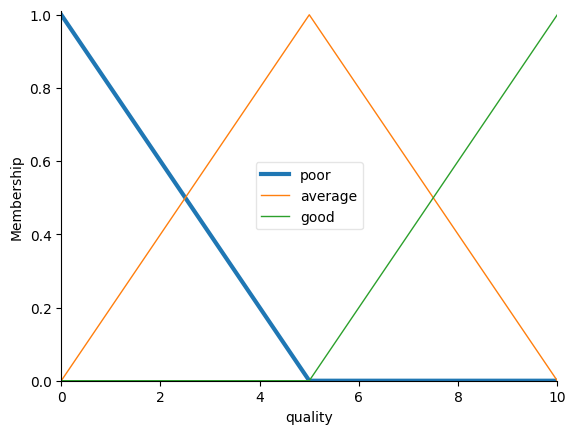

In [64]:
term1 = quality['poor']
term2 = service['poor']
term1.view()

In [68]:
print(f"label: {term1.label}, full_label: {term1.full_label}")
print(f"parent: {term1.parent}")
print(f"membership function: {term1.mf}")
print(f'__repr__(): {term1.__repr__()}')

label: poor, full_label: quality[poor]
parent: Antecedent: quality
membership function: [1.  0.8 0.6 0.4 0.2 0.  0.  0.  0.  0.  0. ]
__repr__(): quality[poor]


*WeightedTerm*

A `Term`, with a weight assigned.
All consequents become `WeightedTerm`s in calculation; if a weight was not assigned, they default to a weight of 1.0.

In [75]:
environment = ctrl.Antecedent(np.arange(1, 10, 1), 'environment')
environment.automf(3)
term3 = environment['poor']
# return WeightedTerm(term3, 50.0)
term_w =  term3.__mod__(50.0)

In [76]:
print(f"term: {term_w.term}")
print(f"weight: {term_w.weight}")
print(f"__repr__(): {term_w.__repr__()}")

term: environment[poor]
weight: 50.0
__repr__(): environment[poor]@50.00%


*TermAggregate*

Used to track the creation of `AND` and `OR` clauses used when building the antecedent of a rule.

In [78]:
# return TermAggregate(term1, term2, 'and')
term_aggregate1 = term1.__and__(term2)
# return TermAggregate(term1, term2, 'or')
term_aggregate2 = term1.__or__(term2)
# return TermAggregate(term1, 'not')
term_aggregate3 = term1.__invert__()

In [83]:
print(term_aggregate1.term1)
print(term_aggregate1.term2)
print(term_aggregate1.kind)
print(term_aggregate1.__repr__())

quality[poor]
service[poor]
and
quality[poor] AND service[poor]


In [87]:
print(term_aggregate1.agg_methods.and_func)
print(term_aggregate1.agg_methods.or_func)

<ufunc 'fmin'>
<ufunc 'fmax'>


## Rule: connecting antecedent(s) to consequent(s)
see `skfuzzy.control.rule`

In [7]:
quality.automf(3)
service.automf(3)
tip.automf(3, 'quant')

rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'], 'IF quality is poor OR service is poor, THEN tip is low.')
rule2 = ctrl.Rule(service['average'], tip['average'], 'IF service is average, THEN tip is average.')
rule3 = ctrl.Rule(quality['good'] | service['good'] , tip['high'], 'IF quality is good OR service is good, THEN tip is high.')

In [10]:
print(rule1.and_func)
print(rule1.or_func)
print(rule1.antecedent)
print(rule1.consequent)
print(rule1.label)
print(rule1.__repr__())

<ufunc 'fmin'>
<ufunc 'fmax'>
quality[poor] OR service[poor]
[tip[low]]
IF quality is poor OR service is poor, THEN tip is low.
IF quality[poor] OR service[poor] THEN tip[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax


In [22]:
space = ctrl.Antecedent(np.arange(0, 11, 1), 'space')
location = ctrl.Antecedent(np.arange(0, 11, 1), 'location')
space['crowd'] = fuzz.trimf(space.universe, [0, 0, 5])
space['roomy'] = fuzz.trimf(space.universe, [5, 10, 10])
location['nearby'] = fuzz.trimf(location.universe, [0, 0, 5])
location['remote'] = fuzz.trimf(location.universe, [5, 10, 10])

In [29]:
rule4 = ctrl.Rule(space['crowd'] & location['remote'], tip['low'])
rule5 = ctrl.Rule(space['roomy'] & location['nearby'], tip['high'])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

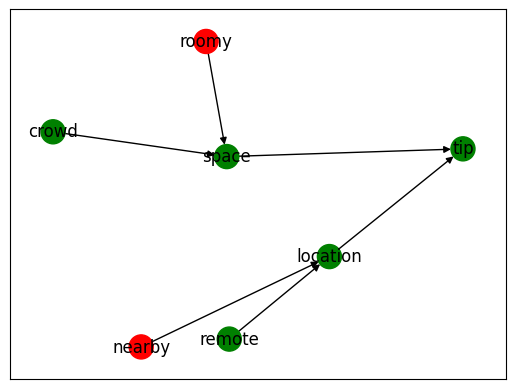

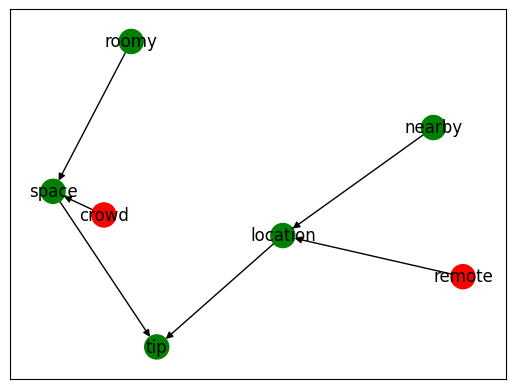

In [31]:
rule4.view_n()
rule5.view_n()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

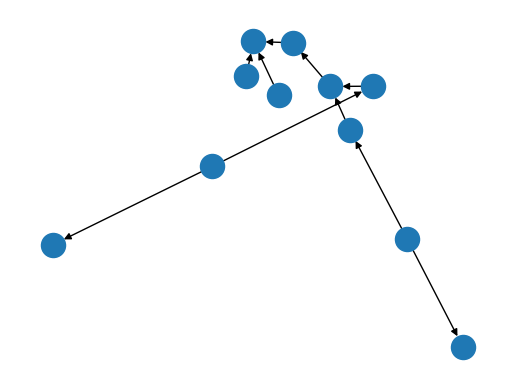

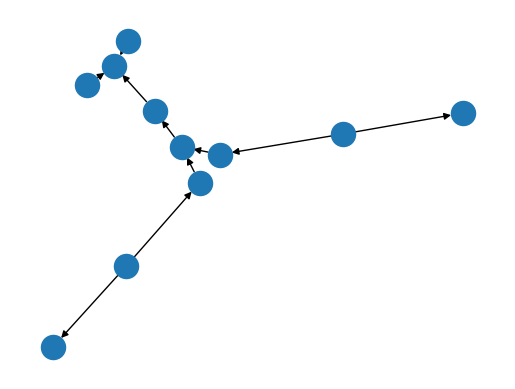

In [34]:
rule4.view()
rule5.view()

## ControlSystemSimulation: Calculate results from a ControlSystem.


In [21]:
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import numpy as np

quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

quality.automf(3)
service.automf(3)
tip.automf(3, 'quant')

# rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'], 'IF quality is poor OR service is poor, THEN tip is low.')
# rule2 = ctrl.Rule(service['average'], tip['average'], 'IF service is average, THEN tip is average.')
# rule3 = ctrl.Rule(quality['good'] | service['good'] , tip['high'], 'IF quality is good OR service is good, THEN tip is high.')
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'], 'R1')
rule2 = ctrl.Rule(service['average'], tip['average'], 'R2')
rule3 = ctrl.Rule(quality['good'] | service['good'] , tip['high'], 'R3')

system = ctrl.ControlSystem([rule1, rule2, rule3])
sys = ctrl.ControlSystemSimulation(system, False)
print(sys.__doc__)


    Calculate results from a ControlSystem.

    Parameters
    ----------
    control_system : ControlSystem
        A fuzzy ControlSystem object.
    clip_to_bounds : bool, optional
        Controls if input values should be clipped to the consequent universe
        range. Default is True.
    cache : bool, optional
        Controls if results should be stored for reference in fuzzy variable
        objects, allowing fast lookup for repeated runs of `.compute()`.
        Unless you are heavily memory constrained leave this `True` (default).
    flush_after_run : int, optional
        Clears cached results after this many repeated, unique simulations.
        The default of 1000 is appropriate for most hardware, but for small
        embedded systems this can be lowered as appropriate. Higher memory
        systems may see better performance with a higher limit.
    


In [23]:
print(f"ctrl: {sys.ctrl}")
print(f"input:\n{sys.input}")
print(f"output: {sys.output}")
print(f"cache: {sys.cache}")
print(f"unique_id: {sys.unique_id}")
print(f"clip_to_bounds: {sys.clip_to_bounds}")

ctrl: <skfuzzy.control.controlsystem.ControlSystem object at 0x000001B13E3B6130>
input:
quality : None
service : None

output: OrderedDict()
cache: True
unique_id: None
clip_to_bounds: False


```javascript
$(document).ready(function () {
    alert('RUNOOB');
});
```

In [22]:
sys.input['quality'] = 11

IndexError: Input value out of bounds.  Max is 10

In [ ]:
sys.ctrl.graph.e

## membership
View membership functions. (see `skfuzzy.membership.generatemf`)


    Triangular membership function generator.

    Parameters
    ----------
    x : 1d array
        Independent variable.
    abc : 1d array, length 3
        Three-element vector controlling shape of triangular function.
        Requires a <= b <= c.

    Returns
    -------
    y : 1d array
        Triangular membership function.
    


d:\Anaconda\envs\mytorch\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


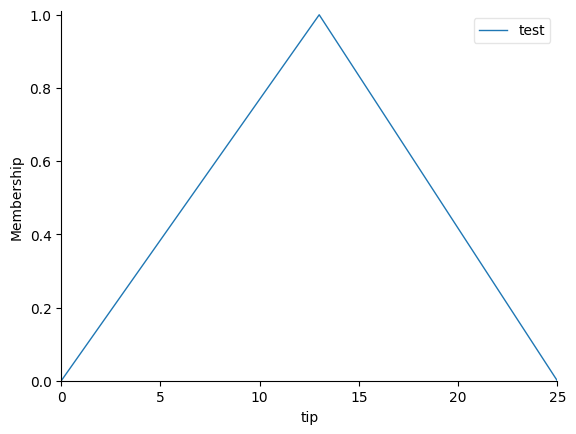

In [3]:
# Triangular membership function.
print(fuzz.trimf.__doc__)
tip['test'] = fuzz.trimf(x=tip.universe, abc=[0, 13, 25])
tip.view()


    Trapezoidal membership function generator.

    Parameters
    ----------
    x : 1d array
        Independent variable.
    abcd : 1d array, length 4
        Four-element vector.  Ensure a <= b <= c <= d.

    Returns
    -------
    y : 1d array
        Trapezoidal membership function.
    


d:\Anaconda\envs\mytorch\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


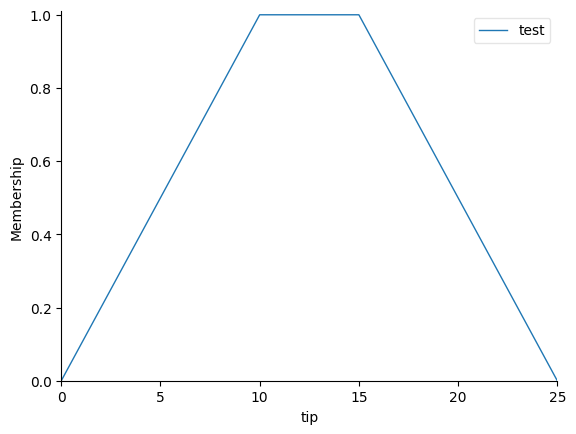

In [4]:
# Trapezoidal membership function
print(fuzz.trapmf.__doc__)
tip['test'] = fuzz.trapmf(x=tip.universe, abcd=[0, 10, 15, 25])
tip.view()


    The basic sigmoid membership function generator.

    Parameters
    ----------
    x : 1d array
        Data vector for independent variable.
    b : float
        Offset or bias.  This is the center value of the sigmoid, where it
        equals 1/2.
    c : float
        Controls 'width' of the sigmoidal region about `b` (magnitude); also
        which side of the function is open (sign). A positive value of `c`
        means the left side approaches 0.0 while the right side approaches 1.;
        a negative value of `c` means the opposite.

    Returns
    -------
    y : 1d array
        Generated sigmoid values, defined as y = 1 / (1. + exp[- c * (x - b)])

    Notes
    -----
    These are the same values, provided separately and in the opposite order
    compared to the publicly available MathWorks' Fuzzy Logic Toolbox
    documentation. Pay close attention to above docstring!
    


d:\Anaconda\envs\mytorch\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


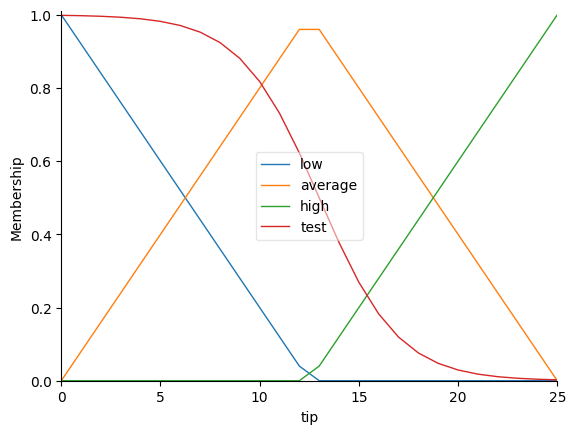

In [29]:
# The basic sigmoid membership function.
print(fuzz.sigmf.__doc__)
tip['test'] = fuzz.sigmf(x=tip.universe, b=13, c=-0.5)
tip.view()


    Product of two sigmoid membership functions.

    Parameters
    ----------
    x : 1d array
        Data vector for independent variable.
    b1 : float
        Offset or bias for the first sigmoid.  This is the center value of the
        sigmoid, where it equals 1/2.
    c1 : float
        Controls 'width' of the first sigmoidal region about `b1` (magnitude),
        and also which side of the function is open (sign). A positive value of
        `c1` means the left side approaches zero while the right side
        approaches one; a negative value of `c1` means the opposite.
    b2 : float
        Offset or bias for the second sigmoid.  This is the center value of the
        sigmoid, where it equals 1/2.
    c2 : float
        Controls 'width' of the second sigmoidal region about `b2` (magnitude),
        and also which side of the function is open (sign). A positive value of
        `c2` means the left side approaches zero while the right side
        approaches one; a negativ

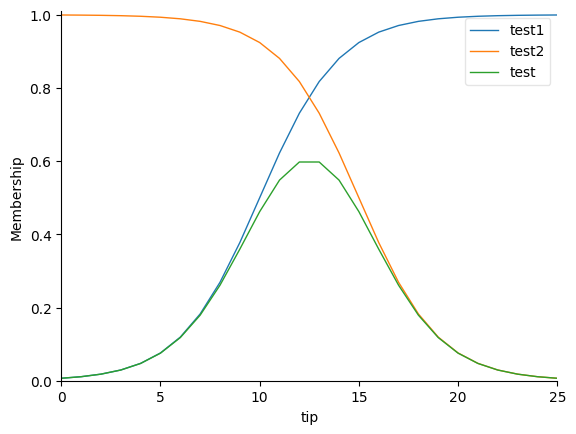

In [29]:
# Product of two sigmoid membership functions.
print(fuzz.psigmf.__doc__)
tip['test1'] = fuzz.sigmf(x=tip.universe, b=10, c=0.5)
tip['test2'] = fuzz.sigmf(x=tip.universe, b=15, c=-0.5)
tip['test'] = fuzz.psigmf(x=tip.universe, b1=10, c1=0.5, b2=15, c2=-0.5)
tip.view()



    Difference of two fuzzy sigmoid membership functions.

    Parameters
    ----------
    x : 1d array
        Independent variable.
    b1 : float
        Midpoint of first sigmoid; f1(b1) = 0.5
    c1 : float
        Width and sign of first sigmoid.
    b2 : float
        Midpoint of second sigmoid; f2(b2) = 0.5
    c2 : float
        Width and sign of second sigmoid.

    Returns
    -------
    y : 1d array
        Generated sigmoid values, defined as
            y = f1 - f2
            f1(x) = 1 / (1. + exp[- c1 * (x - b1)])
            f2(x) = 1 / (1. + exp[- c2 * (x - b2)])
    


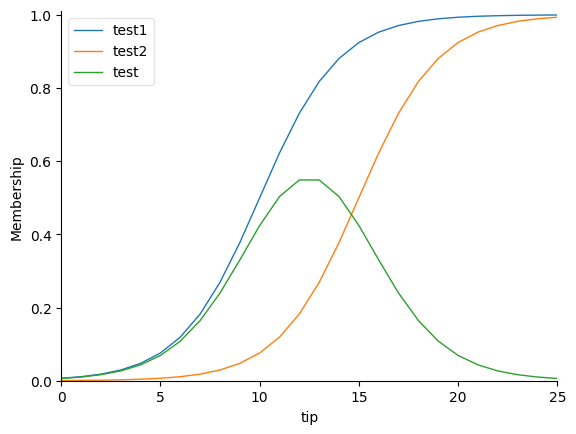

In [21]:
# Difference of two sigmoid membership functions.
print(fuzz.dsigmf.__doc__)
tip['test1'] = fuzz.sigmf(x=tip.universe, b=10, c=0.5)
tip['test2'] = fuzz.sigmf(x=tip.universe, b=15, c=0.5)
tip['test'] = fuzz.dsigmf(x=tip.universe, b1=10, c1=0.5, b2=15, c2=0.5)
tip.view()


    Gaussian fuzzy membership function.

    Parameters
    ----------
    x : 1d array or iterable
        Independent variable.
    mean : float
        Gaussian parameter for center (mean) value.
    sigma : float
        Gaussian parameter for standard deviation.

    Returns
    -------
    y : 1d array
        Gaussian membership function for x.
    


d:\Anaconda\envs\mytorch\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


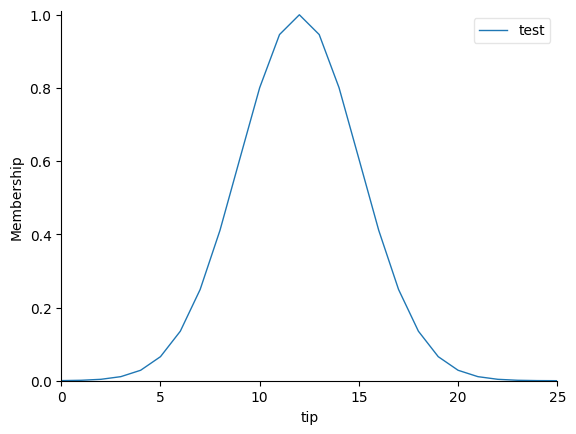

In [3]:
# Gaussian fuzzy membership function.
print(fuzz.gaussmf.__doc__)
tip['test'] = fuzz.gaussmf(x=tip.universe, mean=12, sigma=3)
tip.view()


    Gaussian fuzzy membership function of two combined Gaussians.

    Parameters
    ----------
    x : 1d array or iterable
        Independent variable.
    mean1 : float
        Gaussian parameter for center (mean) value of left-side Gaussian.
        Note mean1 <= mean2 reqiured.
    sigma1 : float
        Standard deviation of left Gaussian.
    mean2 : float
        Gaussian parameter for center (mean) value of right-side Gaussian.
        Note mean2 >= mean1 required.
    sigma2 : float
        Standard deviation of right Gaussian.

    Returns
    -------
    y : 1d array
        Membership function with left side up to `mean1` defined by the first
        Gaussian, and the right side above `mean2` defined by the second.
        In the range mean1 <= x <= mean2 the function has value = 1.
    


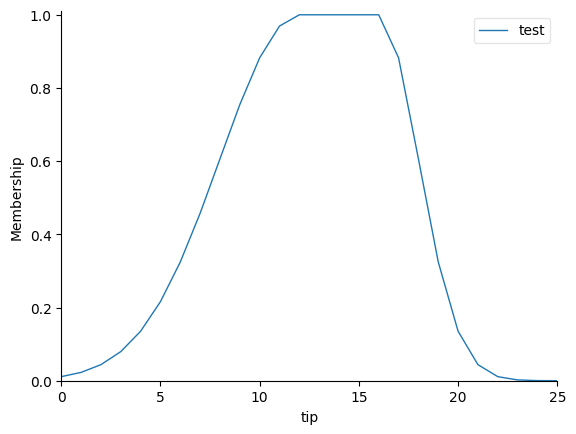

In [5]:
# Gaussian fuzzy membership function of two combined Gaussians.
print(fuzz.gauss2mf.__doc__)
tip['test'] = fuzz.gauss2mf(x=tip.universe, mean1=12, sigma1=4, mean2=16, sigma2=2)
tip.view()


    Generalized Bell function fuzzy membership generator.

    Parameters
    ----------
    x : 1d array
        Independent variable.
    a : float
        Bell function parameter controlling width. See Note for definition.
    b : float
        Bell function parameter controlling slope. See Note for definition.
    c : float
        Bell function parameter defining the center. See Note for definition.

    Returns
    -------
    y : 1d array
        Generalized Bell fuzzy membership function.

    Notes
    -----
    Definition of Generalized Bell function is:

        y(x) = 1 / (1 + abs([x - c] / a) ** [2 * b])
    


d:\Anaconda\envs\mytorch\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


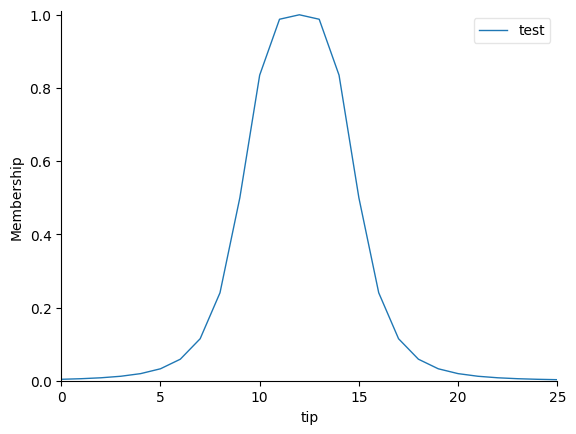

In [6]:
# Generalized Bell function fuzzy membership generator.
print(fuzz.gbellmf.__doc__)
tip['test'] = fuzz.gbellmf(x=tip.universe, a=3, b=2, c=12)
tip.view()


    Piecewise linear membership function (particularly used in FIRE filters).

    Parameters
    ----------
    x : 1d array
        Independent variable vector.
    abc : 1d array, length 3
        Defines the piecewise function. Important: if abc = [a, b, c] then
        a <= b <= c is REQUIRED!

    Returns
    -------
    y : 1d array
        Piecewise fuzzy membership function for x.

    Notes
    -----
    Piecewise definition:
                y = 0,                    min(x) <= x <= a
                y = b(x - a)/c(b - a),    a <= x <= b
                y = x/c,                  b <= x <= c
    


d:\Anaconda\envs\mytorch\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


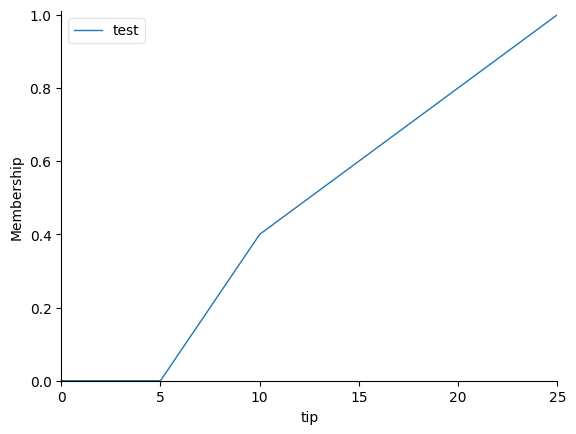

In [7]:
# Piecewise linear membership function.
print(fuzz.piecemf.__doc__)
tip['test'] = fuzz.piecemf(x=tip.universe, abc=[5, 10, 20])
tip.view()


    Pi-function fuzzy membership generator.

    Parameters
    ----------
    x : 1d array
        Independent variable.
    a : float
        Left 'foot', where the function begins to climb from zero.
    b : float
        Left 'ceiling', where the function levels off at 1.
    c : float
        Right 'ceiling', where the function begins falling from 1.
    d : float
        Right 'foot', where the function reattains zero.

    Returns
    -------
    y : 1d array
        Pi-function.

    Notes
    -----
    This is equivalently a product of smf and zmf.
    


d:\Anaconda\envs\mytorch\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


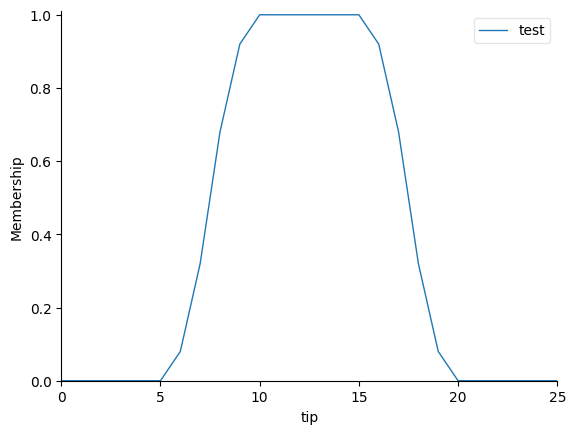

In [9]:
# Pi-function fuzzy membership.
print(fuzz.pimf.__doc__)
tip['test'] = fuzz.pimf(x=tip.universe, a=5, b=10, c=15, d=20)
tip.view()


    Z-function fuzzy membership generator.

    Parameters
    ----------
    x : 1d array
        Independent variable.
    a : float
        'ceiling', where the function begins falling from 1.
    b : float
        'foot', where the function reattains zero.

    Returns
    -------
    y : 1d array
        Z-function.

    Notes
    -----
    Named such because of its Z-like shape.
    


d:\Anaconda\envs\mytorch\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


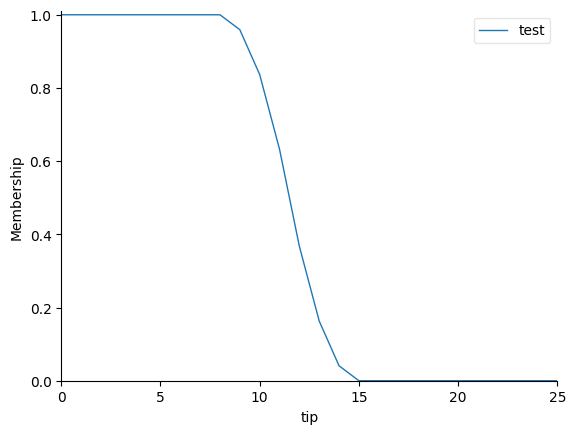

In [10]:
# Z-function fuzzy membership.
print(fuzz.zmf.__doc__)
tip['test'] = fuzz.zmf(x=tip.universe, a=8, b=15)
tip.view()


    S-function fuzzy membership generator.

    Parameters
    ----------
    x : 1d array
        Independent variable.
    a : float
        'foot', where the function begins to climb from zero.
    b : float
        'ceiling', where the function levels off at 1.

    Returns
    -------
    y : 1d array
        S-function.

    Notes
    -----
    Named such because of its S-like shape.
    


d:\Anaconda\envs\mytorch\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


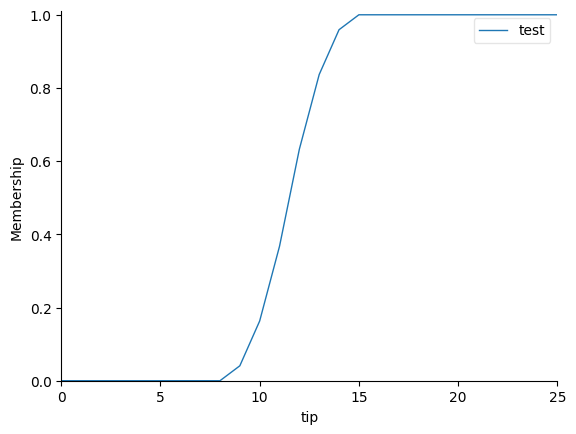

In [11]:
# S-function fuzzy membership.
print(fuzz.smf.__doc__)
tip['test'] = fuzz.smf(x=tip.universe, a=8, b=15)
tip.view()